In [1]:
from optimization_func import simulated_annealing
from helper import mse, lotka_volterra, int_cost_lotka_volterra, get_predator_prey_data

t, P = get_predator_prey_data()

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams["figure.dpi"] = 180
mpl.rcParams["legend.fontsize"] = 11
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"""
\usepackage{palatino}
\usepackage{newpxmath}""")
plt.rc("font", family="serif")

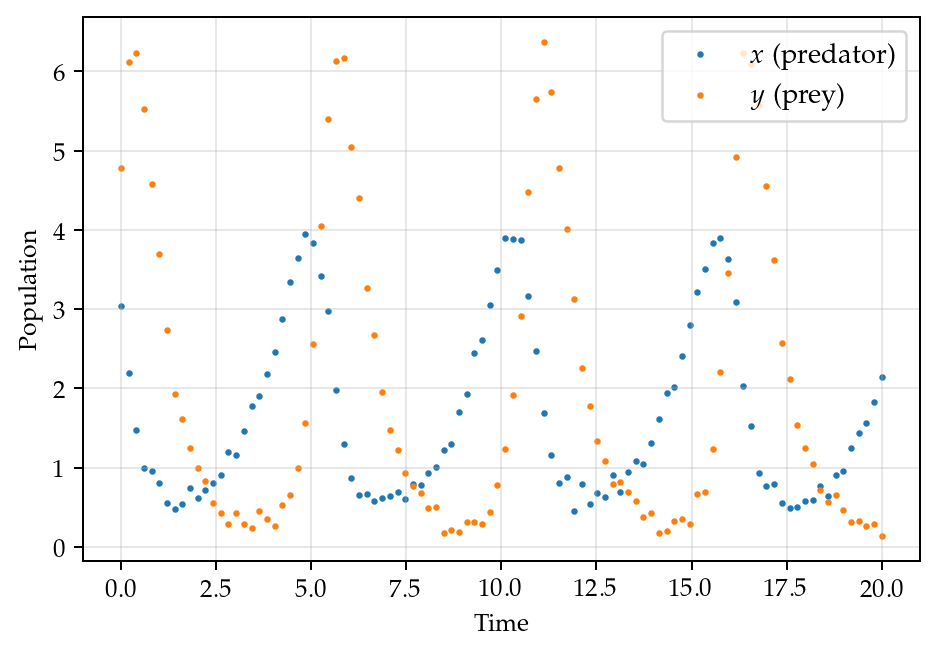

In [3]:
#plt.plot(t, z[0], label="$x$ fit", alpha=0.7)
#plt.plot(t, z[1], label="$y$ fit", alpha=0.7)
plt.scatter(t, P[:,0], s=2.5, label="$x$ (predator)")
plt.scatter(t, P[:,1], s=2.5, label="$y$ (prey)")
plt.ylabel("Population")
plt.xlabel("Time")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

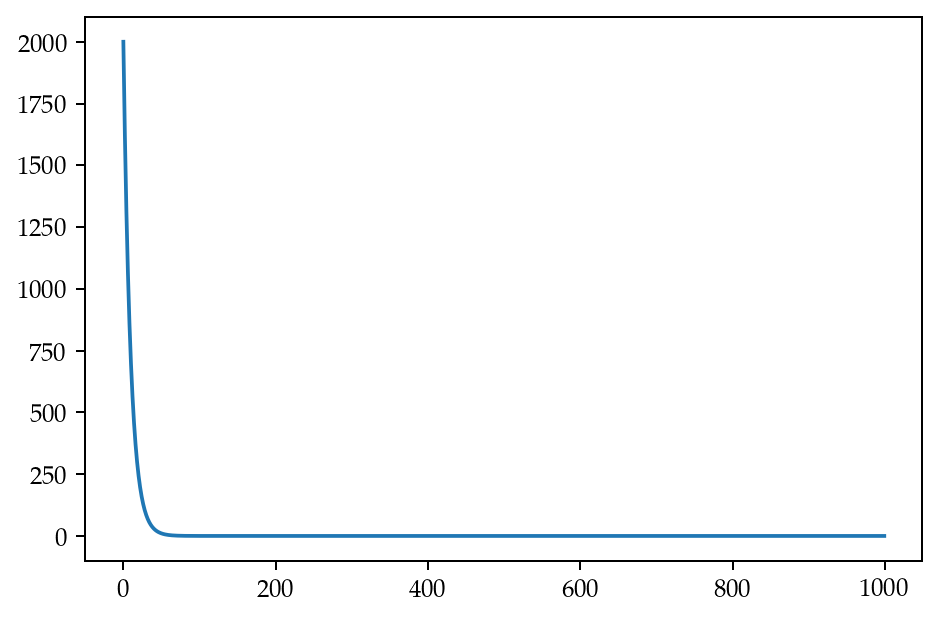

In [4]:
import numpy as np
T_sched2 = 1/np.linspace(0.001, 100, 50)**1.1
T_sched =  [(2000/(1 + 20*np.log(1 + k))) for k in range(50)]
plt.plot([2000*0.9**k for k in range(1000)]) # geometrical cooling schedule
#plt.plot(T_sched)
#plt.plot(T_sched2)


In [5]:
def generate_initial_temperature(Ts, s0, n=10):
    ratio_means = []
    ratio_stdevs = []
    
    for T in Ts:
        accepted_ratios = []
        for i in range(n):
            _, accepted_ratio = simulated_annealing(s0, t, P, T_start=T, T_steps=200, alpha=1)
            accepted_ratios.append(accepted_ratio)
        ratio_means.append(np.mean(accepted_ratios))
        ratio_stdevs.append(np.std(accepted_ratios))
            
    return np.array(ratio_means), np.array(ratio_stdevs)

In [33]:
s0 = [0.2, 0.5, 0.1, 2]
print(int_cost_lotka_volterra(s0, P, t, cost=mse))

Ts = np.linspace(1, 5000, 20, dtype=int)
ratio_means, ratio_stdevs = generate_initial_temperature(Ts, s0)

242.789062504571


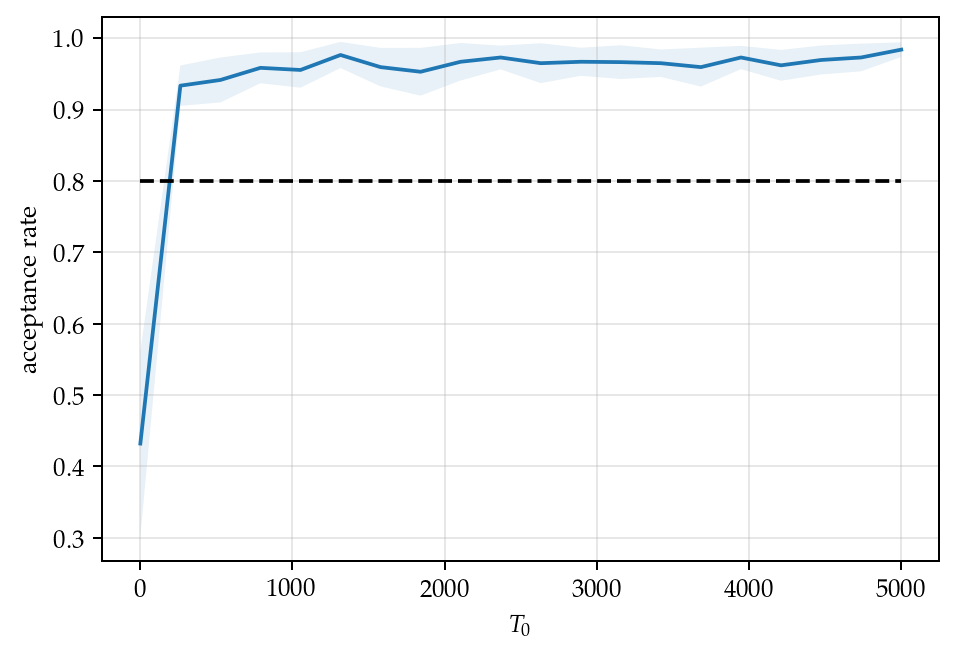

In [38]:
plt.plot(Ts, ratio_means)
plt.fill_between(Ts, ratio_means - ratio_stdevs, ratio_means + ratio_stdevs, alpha=0.1)
plt.hlines(0.8, Ts[0], Ts[-1], linestyles="--", color="black", zorder=3)
#plt.ylim(0.5, 1.05)
plt.xlabel("$T_0$")
plt.ylabel("acceptance rate")
plt.grid(alpha=0.3)
plt.show()

In [35]:
s0_good = [1, 1, 1, 1]
print(int_cost_lotka_volterra(s0_good, P, t, cost=mse))

ratio_means_good, ratio_stdevs_good = generate_initial_temperature(Ts, s0_good)

10.18873746105848


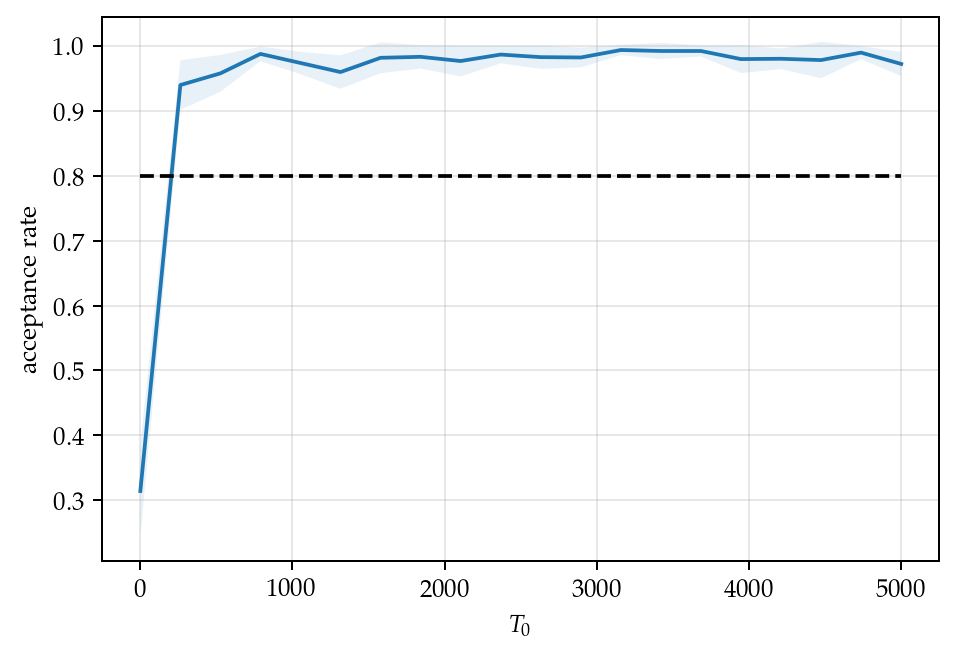

In [40]:
plt.plot(Ts, ratio_means_good)
plt.fill_between(Ts, ratio_means_good - ratio_stdevs_good,
                 ratio_means_good + ratio_stdevs_good, alpha=0.1)
plt.hlines(0.8, Ts[0], Ts[-1], linestyles="--", color="black", zorder=3)
#plt.ylim(0.5, 1.05)
plt.xlabel("$T_0$")
plt.ylabel("acceptance rate")
plt.grid(alpha=0.3)
plt.show()

In [44]:
#np.random.seed(1212)
s0 = [2, 2, 1, 0.5]
print(int_cost_lotka_volterra(s0, P, t, cost=mse))
x, _ = simulated_annealing(s0, t, P, T_start=200, T_steps=5000)

10.871125532479237


In [45]:
print(x)

[0.28930072 0.2710766  1.24012772 2.12110726]


5.753957867163961


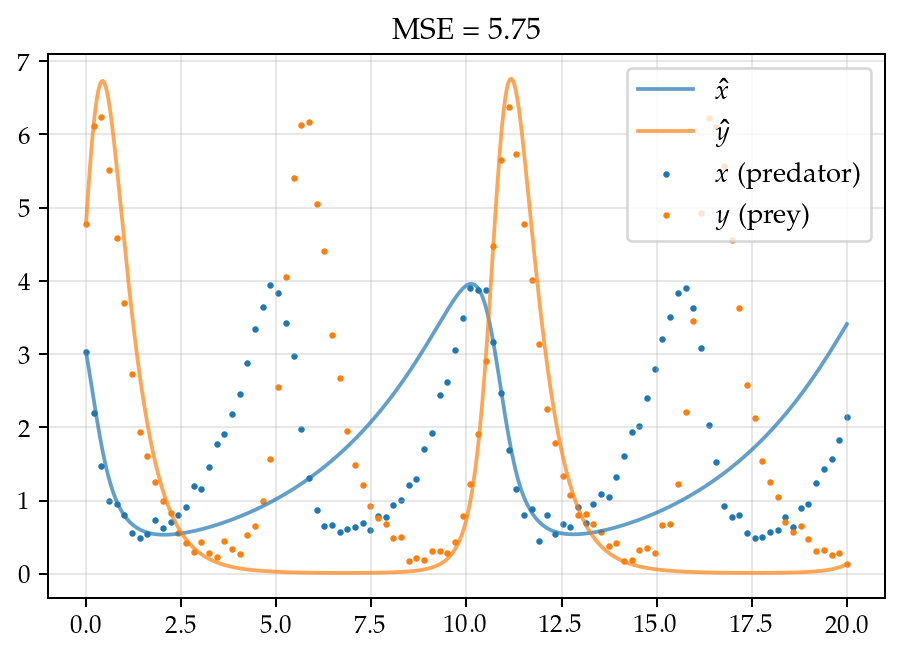

In [46]:
from scipy.integrate import solve_ivp
import numpy as np

sol_opt = solve_ivp(lotka_volterra, (t[0], t[-1]), P[0], args=x, dense_output=True)
z_opt = sol_opt.sol(t)
ts = np.linspace(t[0], t[-1], 500)
z_opt_smooth = sol_opt.sol(ts)

mse_ = mse(P, z_opt.T)
print(mse_)

plt.plot(ts, z_opt_smooth[0], label="$\\hat{x}$", alpha=0.7)
plt.plot(ts, z_opt_smooth[1], label="$\\hat{y}$", alpha=0.7)
plt.scatter(t, P[:,0], s=2.5, label="$x$ (predator)")
plt.scatter(t, P[:,1], s=2.5, label="$y$ (prey)")
plt.title(f"MSE = ${mse_:.2f}$")
plt.legend()
plt.grid(alpha=0.3)
plt.show()